<a href="https://colab.research.google.com/github/Reznov9185/node2vecAnalysis/blob/main/node2vecExperiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installation of the node2vec library.

In [1]:
!pip install node2vec

  Created wheel for node2vec: filename=node2vec-0.4.3-cp37-none-any.whl size=5980 sha256=e2b9215b3df5e0fcf88ee3c21aded255324679ca2378ad32b1a157a19eaba0aa
  Stored in directory: /root/.cache/pip/wheels/34/f4/60/55708b5e797260310451d919c8f898bbd4acd1901367001f20
Successfully built node2vec


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import networkx as nx
import time
%matplotlib inline


Wrapper to use Node2Vec library as we intend

In [3]:
# from nodevectors.embedders import Node2Vec
from node2vec import Node2Vec

class Node2Vec(Node2Vec):
  """
  Parameters
  ----------
  p : float
      p parameter of node2vec
  q : float
      q parameter of node2vec
  d : int
      dimensionality of the embedding vectors
  """
  def __init__(self, graph, p=1, q=1, d=32):
    super().__init__(
                     graph = graph,
                     walk_length=10,
                     p=p,
                     q=q,
                     dimensions =d
                  )

Use the Node2Vec on Zachary Karate Club graph.

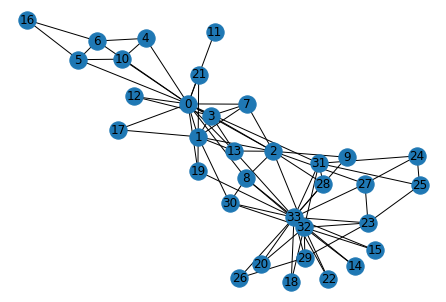

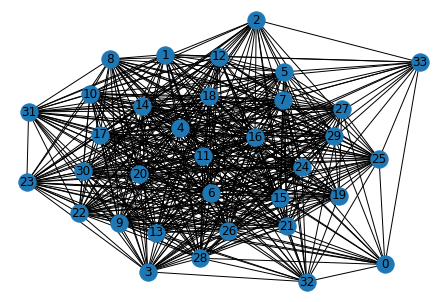

Generating walks (CPU: 1):  70%|███████   | 7/10 [00:00<00:00, 59.13it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 50.37it/s]


Generating walks (CPU: 1):  50%|█████     | 5/10 [00:00<00:00, 47.83it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 46.47it/s]


0.7982099056243896
(34, 2)
(34, 2)


In [12]:
from itertools import combinations

#Loading the Karate club graph from Networkx
KG = nx.karate_club_graph()
KG_negative = nx.karate_club_graph()

# Negative sample Karate Graph
all_possible_edges = list(combinations(KG.nodes(), 2))
edges = list(KG.edges())
no_edges = list(set(all_possible_edges) - set(edges))
KG_negative.remove_edges_from(edges)
KG_negative.add_edges_from(no_edges)

# Plot Karate club with positive sampled edges
nx.draw(KG, with_labels=True)
plt.show()


# Plot Karate club with negative sampled edges
nx.draw(KG_negative, with_labels=True)
plt.show()


# Fit embedding model to the Karate Club graph
start = time.time()
n2v_model_positive = Node2Vec(KG, 1, 1, 2)
n2v_model_negative = Node2Vec(KG_negative, 1, 1, 2)
end = time.time()
print(end - start)

# Embed nodes
model_positive = n2v_model_positive.fit(window=10, min_count=1, batch_words=4)
model_negative = n2v_model_negative.fit(window=10, min_count=1, batch_words=4)

# Node to vec representation
K8_positive =  model_positive.wv.vectors
K8_negative = model_negative.wv.vectors
print(K8_positive.shape)
print(K8_negative.shape)

# embeddings = []
# for id in range(len(KG.nodes)):
#   embedding = K8[id]
#   club = KG.nodes[id]['club']
#   embeddings.append([embedding[0], embedding[1], club])
# df = pd.DataFrame(embeddings, columns=['x', 'y', 'club'])
# colors = ['red' if x == 'Mr. Hi' else 'blue' for x in df.club]
# nx.draw(KG, with_labels=True, node_color=colors)
# plt.show()

In [ ]:
# Embed edges using Hadamard method
from node2vec.edges import HadamardEmbedder

edges_embs = HadamardEmbedder(keyed_vectors=model.wv)

# Get all edges in a separate KeyedVectors instance - use with caution could be huge for big networks
edges_kv = edges_embs.as_keyed_vectors()

# Look for most similar edges - this time tuples must be sorted and as str
edges_kv.most_similar(str(('1', '2')))

Generating edge features: 100%|██████████| 595/595.0 [00:00<00:00, 88789.66it/s]


[("('10', '33')", 1.0),
 ("('22', '4')", 0.9999999403953552),
 ("('17', '27')", 0.9999998211860657),
 ("('2', '33')", 0.9999997019767761),
 ("('1', '10')", 0.9999996423721313),
 ("('20', '20')", 0.9999995827674866),
 ("('17', '21')", 0.9999995231628418),
 ("('11', '17')", 0.9999992251396179),
 ("('0', '10')", 0.9999992251396179),
 ("('20', '30')", 0.9999991655349731)]